# Part 1

In [ ]:
import pandas as pd

In [ ]:
dt = pd.read_csv('ICO_Data.csv')

In [ ]:
dt.head()

,ICO,Token,Softcap,Hardcap,Start,End,Quarterstart,Duration of offering,Country,Category,ERC20,Rating,Number of experts,Bonus,Policy,Number of team members,Distributed in ICO,US restriction,Restricted countries,Accepted fiat,Major cryptocurrencies,Amount raised
0,russianminercoin,RMC,NaN,100000000.0,8/28/2017,9/27/2019,2017q3,760.0,Russia,"Cryptocurrency,BigData",0,2.4,1.0,0,0,7.0,NaN,NaN,NaN,1,1,43000000
1,remecoin,REME,NaN,141270000.0,3/15/2018,6/14/2018,2018q1,91.0,Liechtenstein,"Internet,Businessservices",1,3.2,1.0,0,kyc,21.0,NaN,1.0,"China, USA",1,1,9558576
2,emiba,EMB,15000000,21000000.0,6/1/2018,12/31/2019,2018q2,578.0,Russia,Manufacturing,1,2.6,2.0,0,kyc,9.0,0.58,NaN,NaN,1,1,7012829
3,zeon-network,ZEON,2000000,15000000.0,6/8/2018,10/8/2018,2018q2,122.0,Estonia,"Platform,Investment,Cryptocurrency,Banking,Sma...",1,3.8,1.0,0,0,7.0,0.60,1.0,USA,1,1,700000
4,worldopo,WPT,NaN,NaN,8/17/2018,3/2/2019,2018q3,197.0,Liechtenstein,"VirtualReality,SmartContract,Entertainment,Art...",1,4.5,38.0,1,kyc&whitelist,12.0,0.75,0.0,North Korea,1,1,3392000


In [ ]:
dt.dtypes

ICO                        object
Token                      object
Softcap                    object
Hardcap                   float64
Start                      object
End                        object
Quarterstart               object
Duration of offering      float64
Country                    object
Category                   object
ERC20                       int64
Rating                    float64
Number of experts         float64
Bonus                       int64
Policy                     object
Number of team members    float64
Distributed in ICO        float64
US restriction            float64
Restricted countries       object
Accepted fiat               int64
Major cryptocurrencies      int64
Amount raised              object
dtype: object

In [ ]:
dt.describe()

,Hardcap,Duration of offering,ERC20,Rating,Number of experts,Bonus,Number of team members,Distributed in ICO,US restriction,Accepted fiat,Major cryptocurrencies
count,1.817000e+03,2308.000000,2318.000000,2315.000000,2315.000000,2318.000000,2143.000000,1838.000000,924.000000,2318.000000,2318.000000
mean,1.210704e+08,52.283795,0.751941,3.133866,4.659179,0.439172,10.178721,0.512724,0.784632,0.128128,0.863676
std,1.044491e+09,54.551786,0.431979,0.743094,8.384816,0.496393,6.449204,0.232261,0.411300,0.334304,0.343207
min,1.500000e+02,1.000000,0.000000,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.800000e+06,22.000000,1.000000,2.700000,0.000000,0.000000,6.000000,0.360275,1.000000,0.000000,1.000000
50%,2.000000e+07,31.000000,1.000000,3.200000,1.000000,0.000000,9.000000,0.510000,1.000000,0.000000,1.000000
75%,3.947600e+07,63.000000,1.000000,3.700000,6.000000,1.000000,12.000000,0.700000,1.000000,0.000000,1.000000
max,3.000000e+10,760.000000,1.000000,4.800000,97.000000,1.000000,58.000000,1.000000,1.000000,1.000000,1.000000


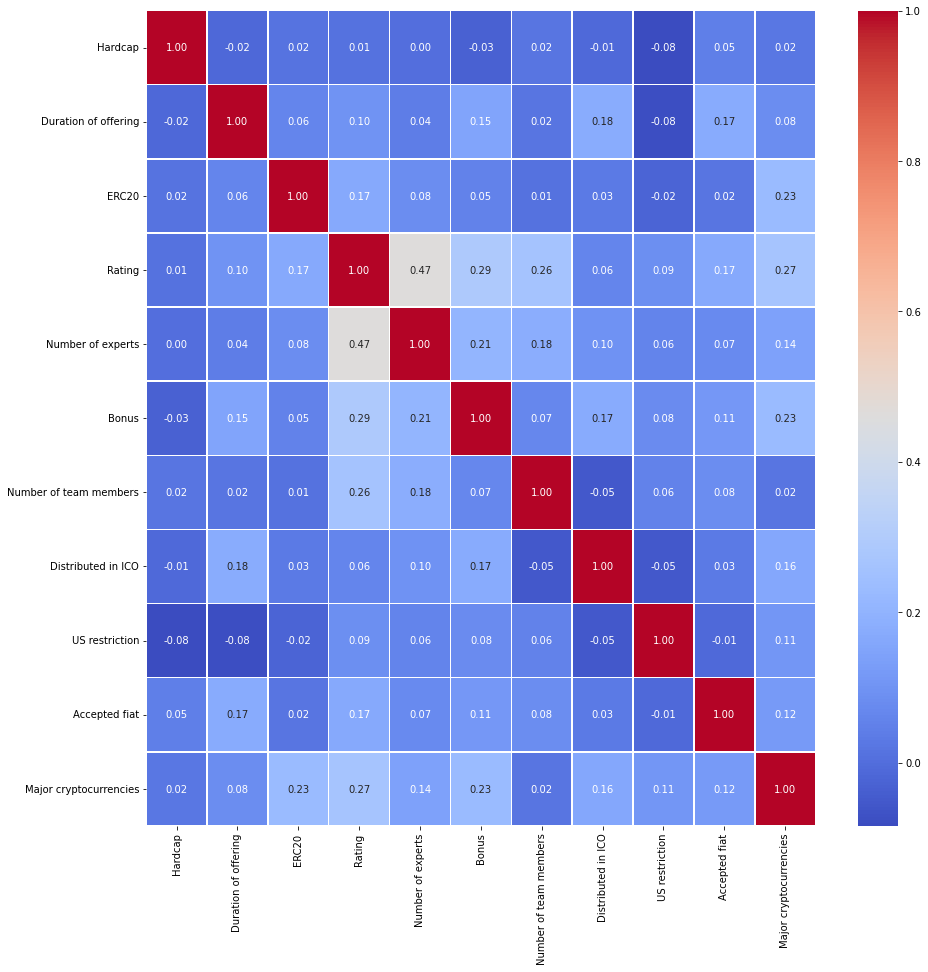

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(dt.corr(),annot=True, linewidths=0.5, fmt='.2f', cmap="coolwarm")
plt.show()

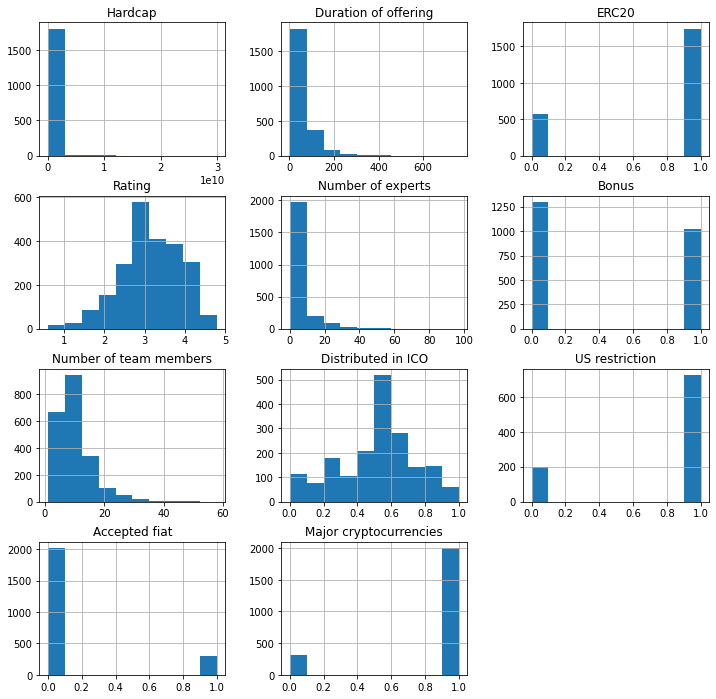

In [ ]:
dt.hist(figsize = (12, 12))
plt.show()

In [ ]:
dt.isnull().values.any()

True

In [ ]:
dd = dict(dt.dtypes)

In [ ]:
dd

{'Accepted fiat': dtype('int64'),
 'Amount raised': dtype('O'),
 'Bonus': dtype('int64'),
 'Category': dtype('O'),
 'Country': dtype('O'),
 'Distributed in ICO': dtype('float64'),
 'Duration of offering': dtype('float64'),
 'ERC20': dtype('int64'),
 'End': dtype('O'),
 'Hardcap': dtype('float64'),
 'ICO': dtype('O'),
 'Major cryptocurrencies': dtype('int64'),
 'Number of experts': dtype('float64'),
 'Number of team members': dtype('float64'),
 'Policy': dtype('O'),
 'Quarterstart': dtype('O'),
 'Rating': dtype('float64'),
 'Restricted countries': dtype('O'),
 'Softcap': dtype('O'),
 'Start': dtype('O'),
 'Token': dtype('O'),
 'US restriction': dtype('float64')}

In [ ]:
# Find and drop rows all with NaN values
nan_index = dt.loc[dt.isna().all(axis=1), :].index
dt = dt.drop(nan_index, axis=0).reset_index(drop=True)

In [ ]:
na_col = dt.columns[dt.isna().any()].tolist()
na_col

['Token',
 'Softcap',
 'Hardcap',
 'Start',
 'End',
 'Duration of offering',
 'Country',
 'Category',
 'Rating',
 'Number of experts',
 'Number of team members',
 'Distributed in ICO',
 'US restriction',
 'Restricted countries',
 'Amount raised']

In [ ]:
for column in na_col:
  if (dd[column] == 'float64'):
    dt[column] = dt[column].fillna(dt[column].mean())
  else:
    dt[column] = dt[column].fillna(dt[column].mode()[0])

In [112]:
dt.isnull().values.any()

False

In [113]:
for x in range(len(dt.Softcap)):
  if dt.Softcap[x] == '#REF!':
    print(x)

In [114]:
for i in range(len(dt.Softcap)):
  dt.Softcap[i] = float(dt.Softcap[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
print(dt.Softcap)

0         1e+06
1         1e+06
2       1.5e+07
3         2e+06
4         1e+06
         ...   
2310      1e+06
2311      1e+06
2312      1e+06
2313      1e+06
2314      1e+06
Name: Softcap, Length: 2315, dtype: object


In [116]:
success = dt.Softcap > 500000
success

0       True
1       True
2       True
3       True
4       True
        ... 
2310    True
2311    True
2312    True
2313    True
2314    True
Name: Softcap, Length: 2315, dtype: bool

In [117]:
success.describe()

count     2315
unique       2
top       True
freq      2129
Name: Softcap, dtype: object

# Part 2

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [107]:
ohe = pd.get_dummies(dt)

In [ ]:
ohe.shape

(2315, 9369)

In [111]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(ohe, success, test_size=0.2)

In [110]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


LogisticRegression()

In [118]:
logisticRegr.predict(x_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
y_pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9157667386609071


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        39
        True       0.92      1.00      0.96       424

    accuracy                           0.92       463
   macro avg       0.46      0.50      0.48       463
weighted avg       0.84      0.92      0.88       463



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0  39]
 [  0 424]]


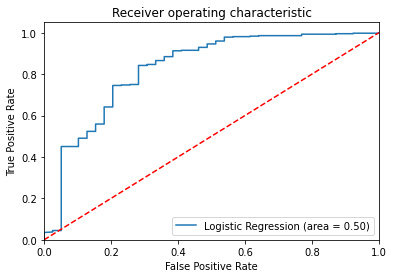

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**PART 3**

In [ ]:
icoRdt = pd.read_csv("ICO_Return.csv")

In [ ]:
icoRdt.head()

,ICO,AR7,AR30,AR180
0,0x,43.507538,21.157102,115.611488
1,holo,1.078509,0.530763,0.814774
2,centrality,-0.229011,-0.039769,-0.528470
3,bittorrent,0.984932,0.533870,-1.058018
4,enjin-coin,-0.082102,-0.369841,6.361898


In [ ]:
icoRdt.describe()

,AR7,AR30,AR180
count,663.000000,661.000000,615.000000
mean,0.174369,0.079542,0.119987
std,2.083875,1.527983,5.745982
min,-1.089030,-1.928606,-6.310816
25%,-0.275012,-0.507258,-0.750747
50%,-0.092996,-0.275939,-0.434095
75%,0.129626,0.091158,-0.156387
max,43.507538,21.157102,115.611488


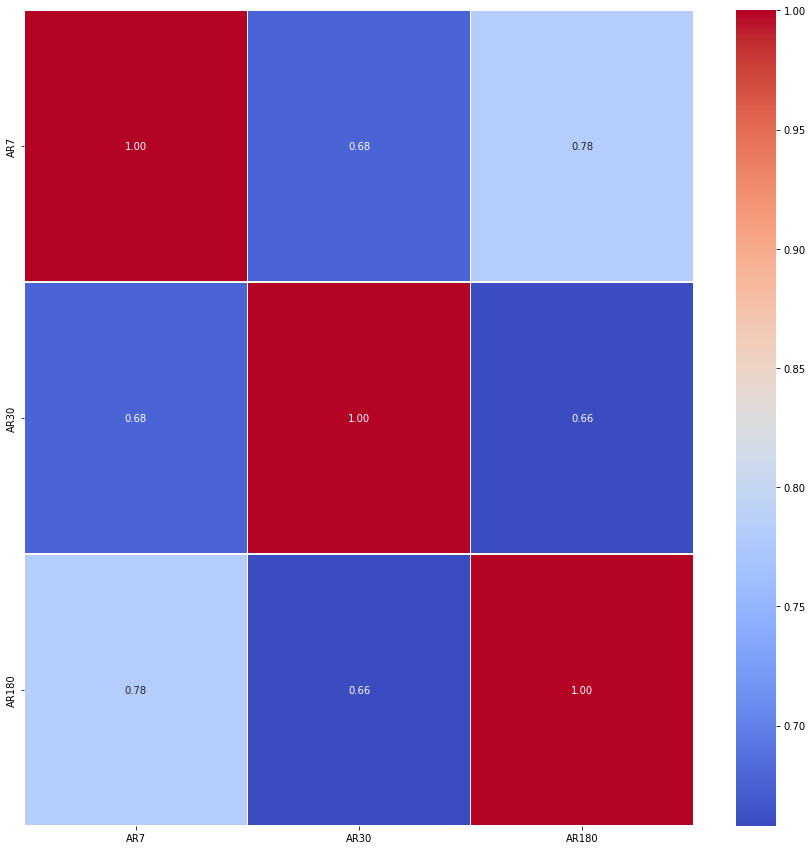

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(icoRdt.corr(),annot=True, linewidths=0.5, fmt='.2f', cmap="coolwarm")
plt.show()

In [119]:
from sklearn import linear_model 

In [120]:
icoRdt.shape

(665, 4)

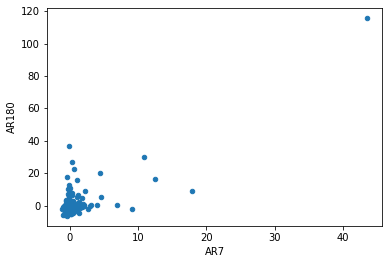

In [122]:
icoRdt.plot(kind="scatter",x='AR7', y="AR180")

In [123]:
icoRdt.corr()

,AR7,AR30,AR180
AR7,1.000000,0.676724,0.783463
AR30,0.676724,1.000000,0.657973
AR180,0.783463,0.657973,1.000000


In [126]:
sdayReturn

,AR7
0,43.507538
1,1.078509
2,-0.229011
3,0.984932
4,-0.082102
...,...
660,-0.265532
661,0.062955
662,-0.220582
663,-0.336669


In [133]:
lm = linear_model.LinearRegression()

nan_index = icoRdt.loc[icoRdt.isna().all(axis=1), :].index
icoRdt = icoRdt.drop(nan_index, axis=0).reset_index(drop=True)
ddr = dict(icoRdt.dtypes)


In [132]:
na_col_rt = icoRdt.columns[icoRdt.isna().any()].tolist()
na_col_rt

['AR7', 'AR30', 'AR180']

In [137]:
for column in na_col_rt:
  if (ddr[column] == 'float64'):
    icoRdt[column] = icoRdt[column].fillna(icoRdt[column].mean())
  else:
    icoRdt[column] = icoRdt[column].fillna(icoRdt[column].mode()[0])

In [152]:
sdayReturn = pd.DataFrame(icoRdt["AR7"].values)
tdayReturn = pd.DataFrame(icoRdt["AR30"].values)
odayReturn = pd.DataFrame(icoRdt["AR180"].values)
sdayReturn

,0
0,43.507538
1,1.078509
2,-0.229011
3,0.984932
4,-0.082102
...,...
660,-0.265532
661,0.062955
662,-0.220582
663,-0.336669


In [175]:
x = sdayReturn.values.reshape(-1,1)
y = tdayReturn.values.reshape(-1,1)
z = odayReturn.values.reshape(-1,1)
model = lm.fit(x,y)
model.score(x,y)

0.4579497271003117

In [173]:
x_new = ([1,1.2,-0.3])
x_new = pd.DataFrame(x_new)
y_pred = model.predict(x_new)
y_pred

array([[ 0.48859969],
       [ 0.58768941],
       [-0.15548354]])

In [181]:
model2 = lm.fit(x,z)
print("model2 score:" )
model2.score(x,z)


model2 score:


0.6004936944723684

In [182]:
model3 = lm.fit(y,z)
print("model3 score:" )
model3.score(y,z)

model3 score:


0.4258163947624365